In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[27]:


import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from IPython.display import Image
from graphviz import Source


# # Data Collection and Analysis

# In[28]:


#loading the diabetes dataset to a pandas Dataframe
creditcard_dataset = pd.read_csv('C:\\Users\\USER\\Base.csv')


# In[29]:


#Printing the first 5 rows of the dataset
creditcard_dataset.head()


# In[30]:


#Finding the size of the dataset
creditcard_dataset.shape


# In[31]:


#Getting the statistical measure of the data
creditcard_dataset.describe()


# In[32]:


# Seperation of types of transactions 0 > Legitimate 1> Fraudulent
creditcard_dataset['fraud_bool'].value_counts()


# In[33]:


#All features means based on the class
creditcard_dataset.groupby('fraud_bool').mean()


# In[34]:


#seperating the data and labels
X = creditcard_dataset.drop(columns='fraud_bool',axis=1)
Y = creditcard_dataset['fraud_bool']


# In[35]:


print (X)


# In[36]:


print (Y)


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Let's say X contains both numerical and categorical features
# For demonstration purposes, I'll assume 'categorical_column' is your categorical feature

# Define the indices or names of the categorical columns
categorical_columns = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
numeric_columns = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']
# Define the preprocessing steps for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values if any
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values if any
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine the preprocessing steps for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),  # Apply numeric transformer to numeric columns
        ('cat', categorical_transformer, categorical_columns)  # Apply categorical transformer to categorical columns
    ])

# Define the full pipeline including preprocessing and scaling
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the pipeline on your data and transform it
standardized_data = pipeline.fit_transform(X)

# Print the standardized data
print(standardized_data)


# In[41]:


X = standardized_data
Y = creditcard_dataset['fraud_bool']


# # print(X)
# print(Y)

# # Splitting between training and test data
# 

# In[42]:


X_train, X_test, Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.3, stratify=Y, random_state=42)


# In[43]:


print(X.shape, X_train.shape, X_test.shape)


# # Feature Handling for decision tree algorithm
# 

# In[44]:


X = creditcard_dataset.drop(columns=['fraud_bool'])
y = creditcard_dataset['fraud_bool']
# Handle missing values, categorical variables, etc.


# # Train the decision tree classifier using the training set

# In[45]:


dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)


# # Use regularization

# In[46]:


dtc = DecisionTreeClassifier(ccp_alpha=0.01)


# In[47]:


dtc.fit(X_train, Y_train)


# # Use the trained model to make predictions

# In[48]:


train_accuracy = dtc.score(X_train, Y_train)
print("Accuracy on training set: {:.10f}".format(train_accuracy))


# In[49]:


Y_pred = dtc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)


# In[50]:


print("Accuracy on test set: {:.10f}".format(accuracy))




# In[ ]:





        income  name_email_similarity  prev_address_months_count  \
0          0.3               0.986506                         -1   
1          0.8               0.617426                         -1   
2          0.8               0.996707                          9   
3          0.6               0.475100                         11   
4          0.9               0.842307                         -1   
...        ...                    ...                        ...   
999995     0.8               0.124690                         -1   
999996     0.9               0.824544                         -1   
999997     0.8               0.140891                         -1   
999998     0.9               0.002480                         52   
999999     0.6               0.993391                         -1   

        current_address_months_count  customer_age  days_since_request  \
0                                 25            40            0.006735   
1                                 8

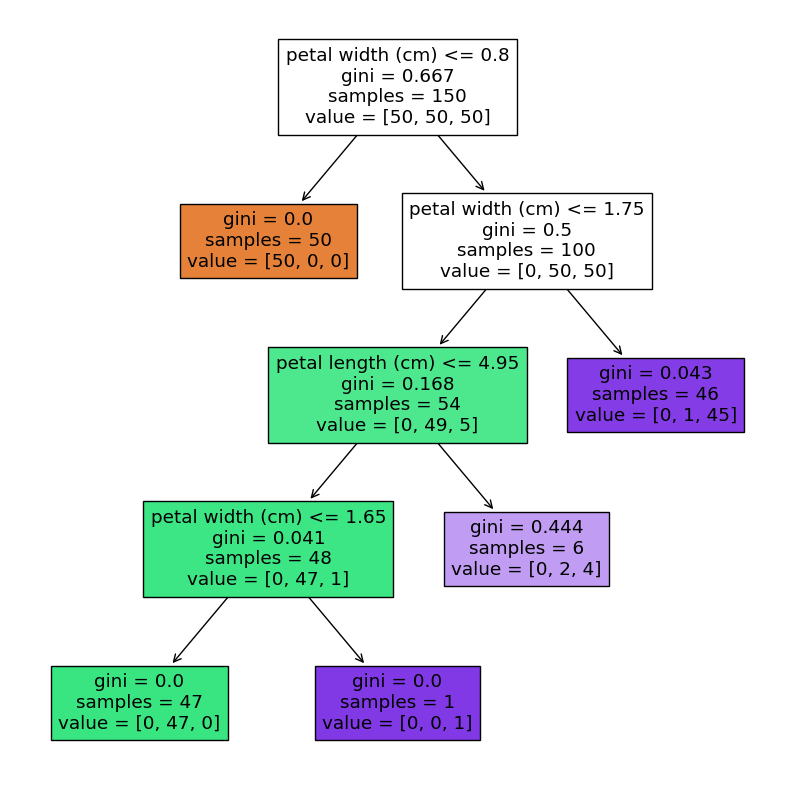

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Train a decision tree model
dt_model = DecisionTreeClassifier(ccp_alpha=0.01)  # You probably meant to use DecisionTreeClassifier here, not RandomForestClassifier
dt_model.fit(iris.data, iris.target)

# Plot the decision tree
plt.figure(figsize=(10, 10))
plot_tree(dt_model, filled=True, feature_names=iris.feature_names)
plt.show()
